In [1]:
#import all libraries needed
import pandas as pd
import numpy as np
from datetime import datetime
import time
import matplotlib.pyplot as plt
import math
import altair as alt

In [2]:
#read in data from csv
wear_data = pd.read_csv('DecentralandDataWearablesWithPolygon.csv', index_col = 0)
wear_data.head()

,sale price (MANA),royaltiesCut,feesCollectorCut,timestamp,type,itemType,bodyShapes,category,collection,rarity,Date,Fee,Network,BodyShape,MANA price (USD),ETH price (USD),Fee Percentage,sale price (USD)
0,11111.0,0.0,111.110,1581364178,order,wearable_v1,['BaseMale'],upper_body,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,epic,2020-02-10,111.110,Ethereum,M,0.064333,228.292261,0.010,714.798988
1,25000.0,0.0,250.000,1581364712,order,wearable_v1,"['BaseMale', 'BaseFemale']",mask,0xc04528c14c8ffd84c7c1fb6719b4a89853035cdd,legendary,2020-02-10,250.000,Ethereum,U,0.064333,228.292261,0.010,1608.313807
2,150.0,0.0,3.750,1581960831,order,wearable_v1,"['BaseMale', 'BaseFemale']",hat,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,rare,2020-02-17,3.750,Ethereum,U,0.057185,262.156244,0.025,8.577801
3,155.0,0.0,3.875,1581960870,order,wearable_v1,"['BaseMale', 'BaseFemale']",helmet,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,rare,2020-02-17,3.875,Ethereum,U,0.057185,262.156244,0.025,8.863727
4,180.0,0.0,4.500,1581963425,order,wearable_v1,"['BaseMale', 'BaseFemale']",hat,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,rare,2020-02-17,4.500,Ethereum,U,0.057185,262.156244,0.025,10.293361


In [3]:
#drop columns that aren't needed
wear_data.drop(['royaltiesCut','feesCollectorCut','bodyShapes','Fee','Fee Percentage'], axis = 1,inplace = True)
wear_data

,sale price (MANA),timestamp,type,itemType,category,collection,rarity,Date,Network,BodyShape,MANA price (USD),ETH price (USD),sale price (USD)
0,11111.00,1581364178,order,wearable_v1,upper_body,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,epic,2020-02-10,Ethereum,M,0.064333,228.292261,714.798988
1,25000.00,1581364712,order,wearable_v1,mask,0xc04528c14c8ffd84c7c1fb6719b4a89853035cdd,legendary,2020-02-10,Ethereum,U,0.064333,228.292261,1608.313807
2,150.00,1581960831,order,wearable_v1,hat,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,rare,2020-02-17,Ethereum,U,0.057185,262.156244,8.577801
3,155.00,1581960870,order,wearable_v1,helmet,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,rare,2020-02-17,Ethereum,U,0.057185,262.156244,8.863727
4,180.00,1581963425,order,wearable_v1,hat,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,rare,2020-02-17,Ethereum,U,0.057185,262.156244,10.293361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192253,15.00,1681825699,mint,wearable_v2,upper_body,0x9376f00e31c46a05dcad41ef7308a25ff1ccffb0,legendary,2023-04-18,Polygon,F,0.691581,2077.535665,10.373708
192254,1.00,1681826803,mint,wearable_v2,upper_body,0x0a04cca75b74c69ac5ad2e219d1b9c180d8fc746,common,2023-04-18,Polygon,U,0.691581,2077.535665,0.691581
192255,1.50,1681826847,mint,wearable_v2,eyewear,0x8cdf396bc0244544af18e30bf4f42db50d75b030,epic,2023-04-18,Polygon,U,0.691581,2077.535665,1.037371
192256,3.00,1681832356,mint,wearable_v2,mouth,0x563e2081b3cd716ed76fc0993b7e49939cb342a5,epic,2023-04-18,Polygon,U,0.691581,2077.535665,2.074742


In [4]:
wear_data.columns.tolist()

['sale price (MANA)',
 'timestamp',
 'type',
 'itemType',
 'category',
 'collection',
 'rarity',
 'Date',
 'Network',
 'BodyShape',
 'MANA price (USD)',
 'ETH price (USD)',
 'sale price (USD)']

In [5]:
#change orde of columns in df
cols = ['sale price (MANA)','sale price (USD)','Date', 'category', 'rarity', 'BodyShape', 'collection',  
        'MANA price (USD)', 'ETH price (USD)','type','itemType','Network','timestamp']
wear_data = wear_data[cols]
wear_data

,sale price (MANA),sale price (USD),Date,category,rarity,BodyShape,collection,MANA price (USD),ETH price (USD),type,itemType,Network,timestamp
0,11111.00,714.798988,2020-02-10,upper_body,epic,M,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.064333,228.292261,order,wearable_v1,Ethereum,1581364178
1,25000.00,1608.313807,2020-02-10,mask,legendary,U,0xc04528c14c8ffd84c7c1fb6719b4a89853035cdd,0.064333,228.292261,order,wearable_v1,Ethereum,1581364712
2,150.00,8.577801,2020-02-17,hat,rare,U,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.057185,262.156244,order,wearable_v1,Ethereum,1581960831
3,155.00,8.863727,2020-02-17,helmet,rare,U,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.057185,262.156244,order,wearable_v1,Ethereum,1581960870
4,180.00,10.293361,2020-02-17,hat,rare,U,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.057185,262.156244,order,wearable_v1,Ethereum,1581963425
...,...,...,...,...,...,...,...,...,...,...,...,...,...
192253,15.00,10.373708,2023-04-18,upper_body,legendary,F,0x9376f00e31c46a05dcad41ef7308a25ff1ccffb0,0.691581,2077.535665,mint,wearable_v2,Polygon,1681825699
192254,1.00,0.691581,2023-04-18,upper_body,common,U,0x0a04cca75b74c69ac5ad2e219d1b9c180d8fc746,0.691581,2077.535665,mint,wearable_v2,Polygon,1681826803
192255,1.50,1.037371,2023-04-18,eyewear,epic,U,0x8cdf396bc0244544af18e30bf4f42db50d75b030,0.691581,2077.535665,mint,wearable_v2,Polygon,1681826847
192256,3.00,2.074742,2023-04-18,mouth,epic,U,0x563e2081b3cd716ed76fc0993b7e49939cb342a5,0.691581,2077.535665,mint,wearable_v2,Polygon,1681832356


In [6]:
#enable json creation for altair to deal with large amount of data
alt.data_transformers.enable('json')

#convert date column
wear_data["Date"] = wear_data["Date"].astype('datetime64[ns]')

In [7]:
#extract columns from date variable
wear_data['year'] = wear_data['Date'].dt.year
wear_data['month'] = wear_data['Date'].dt.month
wear_data['quarter'] = wear_data['Date'].dt.quarter
wear_data['Q Y'] = wear_data['year'].map(str) + ' Q' + wear_data['quarter'].map(str)
wear_data.head()

,sale price (MANA),sale price (USD),Date,category,rarity,BodyShape,collection,MANA price (USD),ETH price (USD),type,itemType,Network,timestamp,year,month,quarter,Q Y
0,11111.0,714.798988,2020-02-10,upper_body,epic,M,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.064333,228.292261,order,wearable_v1,Ethereum,1581364178,2020,2,1,2020 Q1
1,25000.0,1608.313807,2020-02-10,mask,legendary,U,0xc04528c14c8ffd84c7c1fb6719b4a89853035cdd,0.064333,228.292261,order,wearable_v1,Ethereum,1581364712,2020,2,1,2020 Q1
2,150.0,8.577801,2020-02-17,hat,rare,U,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.057185,262.156244,order,wearable_v1,Ethereum,1581960831,2020,2,1,2020 Q1
3,155.0,8.863727,2020-02-17,helmet,rare,U,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.057185,262.156244,order,wearable_v1,Ethereum,1581960870,2020,2,1,2020 Q1
4,180.0,10.293361,2020-02-17,hat,rare,U,0xc1f4b0eea2bd6690930e6c66efd3e197d620b9c2,0.057185,262.156244,order,wearable_v1,Ethereum,1581963425,2020,2,1,2020 Q1


In [8]:
np.max(wear_data['sale price (USD)'])

20555.16778982289

(0.0, 100.0)

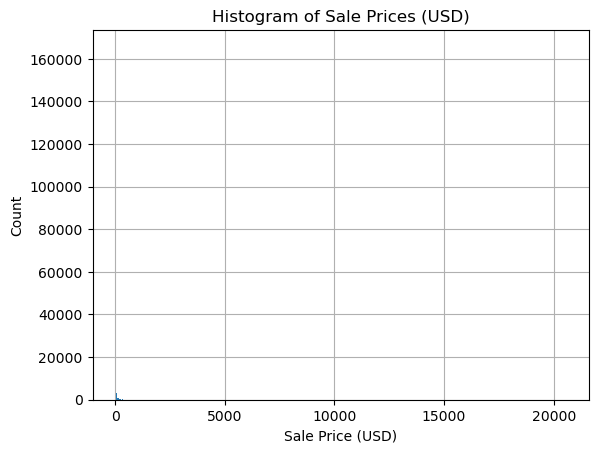

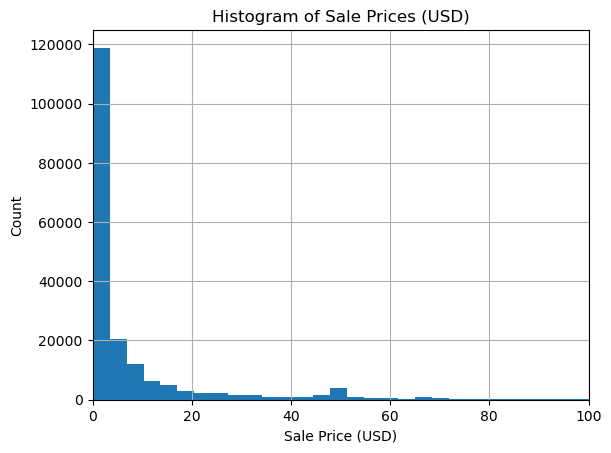

In [9]:
#make histogram of sale prices
wear_data.hist(column = 'sale price (USD)', bins = 1000)
plt.title('Histogram of Sale Prices (USD)')
plt.xlabel('Sale Price (USD)')
plt.ylabel('Count')

wear_data.hist(column = 'sale price (USD)', bins = 6000)
plt.title('Histogram of Sale Prices (USD)')
plt.xlabel('Sale Price (USD)')
plt.ylabel('Count')
plt.xlim([0,100])

In [10]:
#filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["category"])

# Create a container for two different views
base =  alt.Chart(wear_data).properties(width=500, height=250)

# Let's specify our overview chart
overview = alt.Chart(wear_data).mark_bar().encode(
    y = "mean(sale price (USD))",
    x = "category",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250, width=250)

# Create a detail chart
detail = hist = base.mark_bar().encode(
    y = "mean(sale price (USD))", 
    x = "rarity"
).transform_filter(selection).properties(height=250, width=250)

overview | detail

alt.HConcatChart(...)

In [11]:
#filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["rarity"])

# Create a container for two different views
base =  alt.Chart(wear_data).properties(width=500, height=250)

# Let's specify our overview chart
overview = alt.Chart(wear_data).mark_bar().encode(
    y = "mean(sale price (USD))",
    x = "rarity",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250, width=250)

# Create a detail chart
detail = hist = base.mark_bar().encode(
    y = "mean(sale price (USD))", 
    x = "category"
).transform_filter(selection).properties(height=250, width=250)

overview | detail

alt.HConcatChart(...)

In [12]:
# Bind our selection to the legend
selection = alt.selection(type='multi', fields=['=category'], bind='legend')

alt.Chart(wear_data).mark_circle().encode(
    x = "Date",
    y = "sale price (USD)",
    color=alt.Color('category'),# scale=alt.Scale(scheme='spectral')),
    #size="MANA price (USD)",
    tooltip=["Date","rarity", "sale price (USD)"],
    opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).add_selection(selection).interactive()

alt.Chart(...)

In [13]:
# Linked views
# Creating a selection: 
selection = alt.selection(type="multi", fields=["rarity"])

# Create a container for two different views
base =  alt.Chart(wear_data).properties(width=250, height=250)

overview = alt.Chart(wear_data).mark_bar().encode(
    y = "mean(sale price (USD))",
    x = "rarity",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250, width=250)

# Create a histogram
hist = base.mark_bar().encode(
    x = alt.X("sale price (USD)", bin=alt.Bin(maxbins=5)), 
    y = "count()"
).transform_filter(selection)

# Connect our charts using the pipe operation
overview | hist

alt.HConcatChart(...)

In [14]:
#filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["category"])

# Create a container for two different views
base =  alt.Chart(wear_data).properties(width=500, height=250)

# Let's specify our overview chart
overview = alt.Chart(wear_data).mark_bar().encode(
    y = "mean(sale price (USD))",
    x = "category",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250, width=250)

# Create a detail chart
detail = base.mark_bar().encode(
    y = "mean(sale price (USD))", 
    x = "Q Y",
    color = "Network"
).transform_filter(selection).properties(height=250, width=250)

overview | detail

alt.HConcatChart(...)

In [15]:
#filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["category"])

# Create a container for two different views
base =  alt.Chart(wear_data).properties(width=1000, height=500)

# Let's specify our overview chart
overview = alt.Chart(wear_data).mark_bar().encode(
    y = "mean(sale price (USD))",
    x = "category",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=350, width=350)

# Create a detail chart
detail = base.mark_line().encode(
    y = "mean(sale price (USD))", 
    x = "Q Y",
    color = "rarity"
).transform_filter(selection).properties(height=350, width=350)

overview | detail

alt.HConcatChart(...)

In [16]:
#filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["category"])

# Create a container for two different views
base =  alt.Chart(wear_data).properties(width=500, height=250)

# Let's specify our overview chart
overview = alt.Chart(wear_data).mark_bar().encode(
    y = "mean(sale price (USD))",
    x = "category",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250, width=250)

# Create a detail chart
detail1 = base.mark_bar(opacity=0.3, color='#57A44C').encode(
    alt.Y("mean(sale price (USD))", axis=alt.Axis(title='Mean of Sale Price', titleColor='#57A44C')),
    x = "Q Y"#,
    #axis=alt.Axis(title='Mean of Sale Price', titleColor='#57A44C')
).transform_filter(selection).properties(height=250, width=250)

detail2 = base.mark_line(stroke='#5276A7').encode(
    alt.Y("count(sale price (USD))", axis=alt.Axis(title='Number of Sales', titleColor='#5276A7')),
    #y = "count(sale price (USD))", 
    x = "Q Y"
).transform_filter(selection).properties(height=250, width=250)

detailall = alt.layer(detail1, detail2).resolve_scale(
    y='independent'
)

overview | detailall

alt.HConcatChart(...)

In [17]:
#filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["category"])

# Create a container for two different views
base =  alt.Chart(wear_data).properties(width=500, height=250)

# Let's specify our overview chart
overview = alt.Chart(wear_data).mark_bar().encode(
    y = "mean(sale price (USD))",
    x = "category",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250, width=250)

# Create a detail chart
detail1 = base.mark_bar(opacity =0.3).encode(
    alt.Y("mean(sale price (USD))", axis=alt.Axis(title='Mean of Sale Price', titleColor='#57A44C')),
    x = "Q Y",
    color = "Network"
    #axis=alt.Axis(title='Mean of Sale Price', titleColor='#57A44C')
).transform_filter(selection).properties(height=250, width=250)

detail2 = base.mark_line().encode(
    alt.Y("count(sale price (USD))", axis=alt.Axis(title='Number of Sales', titleColor='#5276A7')),
    #y = "count(sale price (USD))", 
    x = "Q Y",
    color = "Network"
).transform_filter(selection).properties(height=250, width=250)

#combine the two details to one chart
detailall = alt.layer(detail1, detail2).resolve_scale(
    y='independent'
)

overview | detailall

alt.HConcatChart(...)

In [18]:
#make df of just Polygon transactions
#ETH transactions sale prices are much higher
#Polygon transactions make up thr majority of sales
wear_data_polygon = wear_data[wear_data["Network"] == "Polygon"]
wear_data_polygon

,sale price (MANA),sale price (USD),Date,category,rarity,BodyShape,collection,MANA price (USD),ETH price (USD),type,itemType,Network,timestamp,year,month,quarter,Q Y
9282,500.00,368.828024,2021-06-10,hat,mythic,U,0x6105f0f5ef8b28cf81e64551588d13221d4151ad,0.737656,2620.625389,order,wearable_v2,Polygon,1623352144,2021,6,2,2021 Q2
9283,100.00,73.765605,2021-06-10,feet,legendary,U,0x6105f0f5ef8b28cf81e64551588d13221d4151ad,0.737656,2620.625389,order,wearable_v2,Polygon,1623352460,2021,6,2,2021 Q2
9284,100.00,73.765605,2021-06-10,feet,legendary,U,0x6105f0f5ef8b28cf81e64551588d13221d4151ad,0.737656,2620.625389,order,wearable_v2,Polygon,1623352528,2021,6,2,2021 Q2
9285,100.00,73.765605,2021-06-10,feet,legendary,U,0x6105f0f5ef8b28cf81e64551588d13221d4151ad,0.737656,2620.625389,order,wearable_v2,Polygon,1623352602,2021,6,2,2021 Q2
9286,100.00,73.765605,2021-06-10,feet,legendary,U,0x6105f0f5ef8b28cf81e64551588d13221d4151ad,0.737656,2620.625389,order,wearable_v2,Polygon,1623353328,2021,6,2,2021 Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192253,15.00,10.373708,2023-04-18,upper_body,legendary,F,0x9376f00e31c46a05dcad41ef7308a25ff1ccffb0,0.691581,2077.535665,mint,wearable_v2,Polygon,1681825699,2023,4,2,2023 Q2
192254,1.00,0.691581,2023-04-18,upper_body,common,U,0x0a04cca75b74c69ac5ad2e219d1b9c180d8fc746,0.691581,2077.535665,mint,wearable_v2,Polygon,1681826803,2023,4,2,2023 Q2
192255,1.50,1.037371,2023-04-18,eyewear,epic,U,0x8cdf396bc0244544af18e30bf4f42db50d75b030,0.691581,2077.535665,mint,wearable_v2,Polygon,1681826847,2023,4,2,2023 Q2
192256,3.00,2.074742,2023-04-18,mouth,epic,U,0x563e2081b3cd716ed76fc0993b7e49939cb342a5,0.691581,2077.535665,mint,wearable_v2,Polygon,1681832356,2023,4,2,2023 Q2


In [19]:
#filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["category"])

# Create a container for two different views
base =  alt.Chart(wear_data_polygon).properties(width=500, height=250)

# Let's specify our overview chart
overview = alt.Chart(wear_data_polygon).mark_bar().encode(
    y = "mean(sale price (USD))",
    x = "category",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250, width=250)

# Create a detail chart
detail = base.mark_line().encode(
    y = "mean(sale price (USD))", 
    x = "Q Y",
    color = "type"
).transform_filter(selection).properties(height=250, width=250)

overview | detail

alt.HConcatChart(...)

In [20]:
#filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["category"])

# Create a container for two different views
base =  alt.Chart(wear_data_polygon).properties(width=500, height=250)

# Let's specify our overview chart
overview = alt.Chart(wear_data_polygon).mark_bar().encode(
    y = "mean(sale price (USD))",
    x = "category",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250, width=250)

# Create a detail chart
detail1 = base.mark_bar(opacity =0.3).encode(
    alt.Y("mean(sale price (USD))", axis=alt.Axis(title='Mean of Sale Price', titleColor='#57A44C')),
    x = "Q Y",
    color = "type"
    #axis=alt.Axis(title='Mean of Sale Price', titleColor='#57A44C')
).transform_filter(selection).properties(height=250, width=250)

detail2 = base.mark_line().encode(
    alt.Y("count(sale price (USD))", axis=alt.Axis(title='Number of Sales', titleColor='#5276A7')),
    #y = "count(sale price (USD))", 
    x = "Q Y",
    color = "type"
).transform_filter(selection).properties(height=250, width=250)

#Putting both details on one chart
detailall = alt.layer(detail1, detail2).resolve_scale(
    y='independent'
)

overview | detailall

alt.HConcatChart(...)

In [21]:
# Linked views
# Creating a selection: 
selection = alt.selection(type="multi", fields=["rarity"])

# Create a container for our two different views
base =  alt.Chart(wear_data_polygon).properties(width=250, height=250)

overview = alt.Chart(wear_data_polygon).mark_bar().encode(
    y = "mean(sale price (USD))",
    x = "rarity",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250, width=250)

# Create a histogram
hist = base.mark_bar(clip = True).encode(
    x = alt.X("sale price (USD)", bin=alt.Bin(maxbins=500), scale=alt.Scale(domain = (0,1000))), 
    y = "count()"
).transform_filter(selection)

# Connect our charts using the pipe operation
overview | hist

alt.HConcatChart(...)

In [22]:
#filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["category"])

# Create a container for two different views
base =  alt.Chart(wear_data_polygon).properties(width=500, height=250)

# Let's specify our overview chart
overview = alt.Chart(wear_data_polygon).mark_bar().encode(
    y = "mean(sale price (USD))",
    x = "category",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250, width=250)

# Create a detail chart
detail1 = base.mark_bar(opacity=0.3, color='#57A44C').encode(
    alt.Y("mean(sale price (USD))", axis=alt.Axis(title='Mean of Sale Price', titleColor='#57A44C')),
    x = "Q Y"#,
    #axis=alt.Axis(title='Mean of Sale Price', titleColor='#57A44C')
).transform_filter(selection).properties(height=250, width=250)

detail2 = base.mark_line(stroke='#5276A7').encode(
    alt.Y("count(sale price (USD))", axis=alt.Axis(title='Number of Sales', titleColor='#5276A7')),
    #y = "count(sale price (USD))", 
    x = "Q Y"
).transform_filter(selection).properties(height=250, width=250)

#put both details on one chart
detailall = alt.layer(detail1, detail2).resolve_scale(
    y='independent'
)

overview | detailall

alt.HConcatChart(...)

In [24]:
#make df with no unique rarity because they are much larger
wear_data_polygon_no_unique = wear_data_polygon[wear_data_polygon["rarity"] != "unique"]
wear_data_polygon_no_unique

,sale price (MANA),sale price (USD),Date,category,rarity,BodyShape,collection,MANA price (USD),ETH price (USD),type,itemType,Network,timestamp,year,month,quarter,Q Y
9282,500.00,368.828024,2021-06-10,hat,mythic,U,0x6105f0f5ef8b28cf81e64551588d13221d4151ad,0.737656,2620.625389,order,wearable_v2,Polygon,1623352144,2021,6,2,2021 Q2
9283,100.00,73.765605,2021-06-10,feet,legendary,U,0x6105f0f5ef8b28cf81e64551588d13221d4151ad,0.737656,2620.625389,order,wearable_v2,Polygon,1623352460,2021,6,2,2021 Q2
9284,100.00,73.765605,2021-06-10,feet,legendary,U,0x6105f0f5ef8b28cf81e64551588d13221d4151ad,0.737656,2620.625389,order,wearable_v2,Polygon,1623352528,2021,6,2,2021 Q2
9285,100.00,73.765605,2021-06-10,feet,legendary,U,0x6105f0f5ef8b28cf81e64551588d13221d4151ad,0.737656,2620.625389,order,wearable_v2,Polygon,1623352602,2021,6,2,2021 Q2
9286,100.00,73.765605,2021-06-10,feet,legendary,U,0x6105f0f5ef8b28cf81e64551588d13221d4151ad,0.737656,2620.625389,order,wearable_v2,Polygon,1623353328,2021,6,2,2021 Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192253,15.00,10.373708,2023-04-18,upper_body,legendary,F,0x9376f00e31c46a05dcad41ef7308a25ff1ccffb0,0.691581,2077.535665,mint,wearable_v2,Polygon,1681825699,2023,4,2,2023 Q2
192254,1.00,0.691581,2023-04-18,upper_body,common,U,0x0a04cca75b74c69ac5ad2e219d1b9c180d8fc746,0.691581,2077.535665,mint,wearable_v2,Polygon,1681826803,2023,4,2,2023 Q2
192255,1.50,1.037371,2023-04-18,eyewear,epic,U,0x8cdf396bc0244544af18e30bf4f42db50d75b030,0.691581,2077.535665,mint,wearable_v2,Polygon,1681826847,2023,4,2,2023 Q2
192256,3.00,2.074742,2023-04-18,mouth,epic,U,0x563e2081b3cd716ed76fc0993b7e49939cb342a5,0.691581,2077.535665,mint,wearable_v2,Polygon,1681832356,2023,4,2,2023 Q2


In [25]:
#chart for category vs sale price by rarity
alt.Chart(wear_data_polygon_no_unique).mark_line().encode(
    x = alt.X("category", title = "Category"),
    y = alt.Y("mean(sale price (USD))", axis=alt.Axis(title='Average Sale Price (USD)')),
    color= alt.Color('rarity', title = 'Rarity'),
    #color = 'Closest Plaza',
    #size="Estate Size",
    tooltip=["rarity"],
    #opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).interactive().properties(width=500, height=300).configure_view(stroke=None).configure_legend(
    symbolSize = 150,symbolStrokeWidth =5, labelFontSize=15, titleFontSize = 15).configure_axis(
    grid = False, titleFontSize=15, labelFontSize = 12, titleFontWeight = 'normal')

alt.Chart(...)

In [26]:
alt.Chart(wear_data_polygon_no_unique).mark_line().encode(
    x = "Q Y",
    y = "mean(sale price (USD))",
    color= 'rarity',
    #color = 'Closest Plaza',
    #size="Estate Size",
    tooltip=["rarity"],
    #opacity=alt.condition(selection,alt.value(1),alt.value(.2))
).interactive().properties(width=750, height=500)

alt.Chart(...)

In [27]:
base =  alt.Chart(wear_data).properties(width=600, height=600)

# Create a detail chart
#detail1 = base.mark_bar(opacity=0.3, color='#57A44C').encode(
detail1 = base.mark_circle(opacity=0.3).encode(
    alt.Y("mean(sale price (USD))", axis=alt.Axis(title='Mean of Sale Price', titleColor='#57A44C')),
    x = "Q Y",
    #axis=alt.Axis(title='Mean of Sale Price', titleColor='#57A44C')
    color = 'Network'
).properties(height=600, width=600)

#detail2 = base.mark_line(stroke='#5276A7').encode(
detail2 = base.mark_line().encode(
    alt.Y("count(sale price (USD))", axis=alt.Axis(title='Number of Sales', titleColor='#5276A7')),
    #y = "count(sale price (USD))", 
    x = "Q Y",
    color = "Network",
    shape = 'Network'
).properties(height=600, width=600)

detailall = alt.layer(detail1, detail2).resolve_scale(
    y='independent'
)
detailall

alt.LayerChart(...)

In [28]:
#get ave sale price and number of sales by quarter
by_quarter_ave = wear_data.groupby(['Network','Q Y'], as_index = False).agg({"sale price (USD)" : "mean"})
num_sales_by_quarter = wear_data.groupby(['Network','Q Y'], as_index = False).agg({"sale price (USD)" : "count"})

#get ave sale price and number of sales by quarter for ETH and Polygon
by_quarter_ave_ETH = by_quarter_ave[by_quarter_ave['Network'] == 'Ethereum']
by_quarter_ave_P = by_quarter_ave[by_quarter_ave['Network'] == 'Polygon']
num_sales_by_quarter_ETH = num_sales_by_quarter[num_sales_by_quarter['Network'] == 'Ethereum']
num_sales_by_quarter_P = num_sales_by_quarter[num_sales_by_quarter['Network'] == 'Polygon']
print(by_quarter_ave_ETH.iloc[:,1])
print(by_quarter_ave_P)
print(by_quarter_ave)
print(num_sales_by_quarter_ETH)
print(num_sales_by_quarter_P)
print(num_sales_by_quarter)


0     2020 Q1
1     2020 Q2
2     2020 Q3
3     2020 Q4
4     2021 Q1
5     2021 Q2
6     2021 Q3
7     2021 Q4
8     2022 Q1
9     2022 Q2
10    2022 Q3
11    2022 Q4
12    2023 Q1
13    2023 Q2
Name: Q Y, dtype: object
    Network      Q Y  sale price (USD)
14  Polygon  2021 Q2         69.040953
15  Polygon  2021 Q3         88.558160
16  Polygon  2021 Q4         82.623116
17  Polygon  2022 Q1         13.355548
18  Polygon  2022 Q2          5.480751
19  Polygon  2022 Q3          5.094084
20  Polygon  2022 Q4          4.332432
21  Polygon  2023 Q1          6.724257
22  Polygon  2023 Q2          3.946488
     Network      Q Y  sale price (USD)
0   Ethereum  2020 Q1         12.161894
1   Ethereum  2020 Q2         14.049776
2   Ethereum  2020 Q3         48.993634
3   Ethereum  2020 Q4         77.384209
4   Ethereum  2021 Q1        481.093183
5   Ethereum  2021 Q2        293.898094
6   Ethereum  2021 Q3        285.044674
7   Ethereum  2021 Q4        759.611659
8   Ethereum  2022 Q1        

In [29]:
h = 400
w = 400

base =  alt.Chart(wear_data).properties(width=w, height=h)
# Create a detail chart
detail1 = base.mark_bar(filled = False, strokeWidth = 1.5, color='black').encode(# opacity=0.3, color='black').encode( #color='#57A44C').encode(
    alt.Y("mean(sale price (USD))", axis=alt.Axis(title='Average Sale Price (USD)', titleColor='black')),
    x = "category"#,
    #axis=alt.Axis(title='Mean of Sale Price', titleColor='#57A44C')
).properties(height=h, width=w)

detail2 = base.mark_line(strokeDash = [10.5], strokeWidth = 2, stroke='orange').encode( #stroke='#5276A7').encode(
    alt.Y("count(sale price (USD))", axis=alt.Axis(title='Number of Sales', titleColor='orange')),
    #y = "count(sale price (USD))", 
    x = "category"
).properties(height=h, width=w)

detail3 = base.mark_point(filled = True, stroke='orange', color = "orange").encode( #stroke='#5276A7').encode(
    alt.Y("count(sale price (USD))", axis=alt.Axis(title='Number of Sales', titleColor='orange')),
    #y = "count(sale price (USD))", 
    x = "category"
).properties(height=h, width=w)

#combine all into one chart
detailall = alt.layer(detail1, detail2+detail3).resolve_scale(
    y='independent'
).configure_axis(titleFontSize=15, labelFontSize = 12, titleFontWeight = "normal")

detailall

alt.LayerChart(...)

In [30]:
h = 300
w = 300

base =  alt.Chart(wear_data).properties(width=w, height=h)
# Create a detail chart
detail1 = base.mark_bar(opacity=0.3, color='#57A44C').encode(
    alt.Y("mean(sale price (USD))", axis=alt.Axis(title='Mean of Sale Price', titleColor='#57A44C')),
    x = "rarity"#,
    #axis=alt.Axis(title='Mean of Sale Price', titleColor='#57A44C')
).properties(height=h, width=w)

detail2 = base.mark_line(stroke='#5276A7').encode(
    alt.Y("count(sale price (USD))", axis=alt.Axis(title='Number of Sales', titleColor='#5276A7')),
    #y = "count(sale price (USD))", 
    x = "rarity"
).properties(height=h, width=w)

#combine details into one chart
detailall = alt.layer(detail1, detail2).resolve_scale(
    y='independent'
)

detailall

alt.LayerChart(...)

Text(0.5, 1.0, 'Decentraland Wearable NFT Sales')

<Figure size 640x480 with 0 Axes>

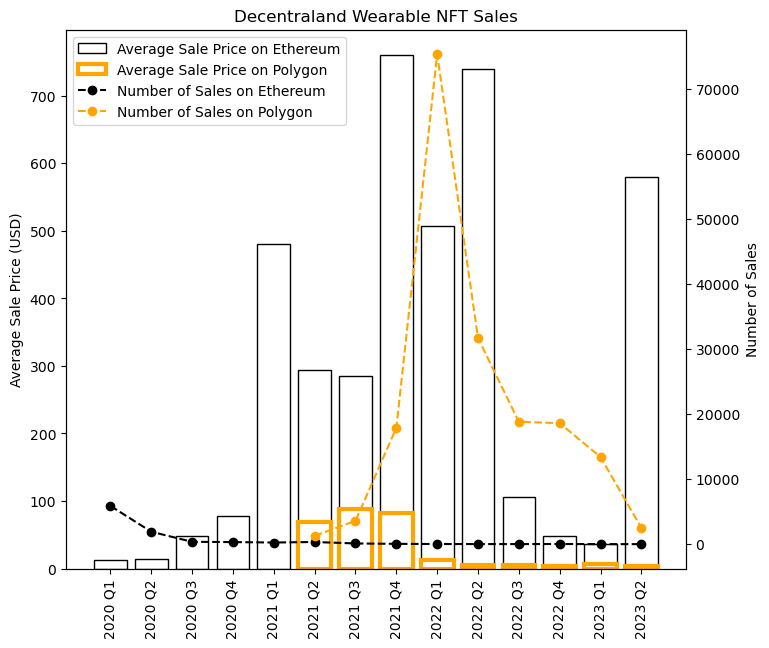

In [31]:
#make plot for average sale price on ETH and Polygon and number of sales on ETH and Polygon
plt.figure();
fig, ax1 = plt.subplots()
fig.set_size_inches(8, 7)
ax2 = ax1.twinx()
ax1.bar(by_quarter_ave_ETH.iloc[:,1],by_quarter_ave_ETH.iloc[:,2], label = 'Average Sale Price on Ethereum',
       fill = False)
ax1.bar(by_quarter_ave_P.iloc[:,1],by_quarter_ave_P.iloc[:,2], label = 'Average Sale Price on Polygon',
        fill = False, linewidth = 3, edgecolor = 'orange')
ax2.plot(num_sales_by_quarter_ETH.iloc[:,1],num_sales_by_quarter_ETH.iloc[:,2],'k--', marker = 'o', label = 'Number of Sales on Ethereum')
ax2.plot(num_sales_by_quarter_P.iloc[:,1],num_sales_by_quarter_P.iloc[:,2], color = 'orange', 
         linestyle = 'dashed', marker ='o', label = 'Number of Sales on Polygon')
ax1.set_ylabel('Average Sale Price (USD)')
ax2.set_ylabel('Number of Sales')
#ax2.ylim([0,70000])
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2,labels+labels2)
#ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)
ax1.tick_params(axis = 'x', labelrotation = 90)
plt.title('Decentraland Wearable NFT Sales')

Text(0.5, 1.0, 'Decentraland Wearable NFT Sales on Ethereum')

<Figure size 640x480 with 0 Axes>

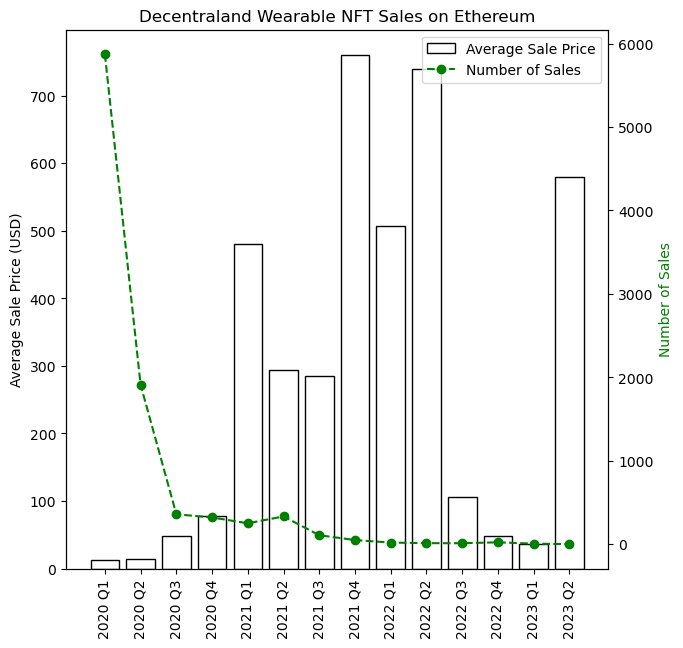

In [32]:
#make plot for average sale price and number of sales on ETH
plt.figure();
fig, ax1 = plt.subplots()
fig.set_size_inches(7, 7)
ax2 = ax1.twinx()
ax1.bar(by_quarter_ave_ETH.iloc[:,1],by_quarter_ave_ETH.iloc[:,2], label = 'Average Sale Price',
       fill = False)
#ax1.bar(by_quarter_ave_P.iloc[:,1],by_quarter_ave_P.iloc[:,2], label = 'Polygon Average Sale Price',
        #fill = False, linewidth = 3, edgecolor = 'g')
ax2.plot(num_sales_by_quarter_ETH.iloc[:,1],num_sales_by_quarter_ETH.iloc[:,2],'g--', marker = 'o', label = 'Number of Sales')
#ax2.plot(num_sales_by_quarter_P.iloc[:,1],num_sales_by_quarter_P.iloc[:,2], 'g-o', label = 'Polygon Number of Sales')
ax1.set_ylabel('Average Sale Price (USD)')
ax2.set_ylabel('Number of Sales', color = 'g')
#ax2.ylim([0,70000])
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2,labels+labels2)
#ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)
ax1.tick_params(axis = 'x', labelrotation = 90)
plt.title('Decentraland Wearable NFT Sales on Ethereum')

Text(0.5, 1.0, 'Decentraland Wearable NFT Sales on Polygon')

<Figure size 640x480 with 0 Axes>

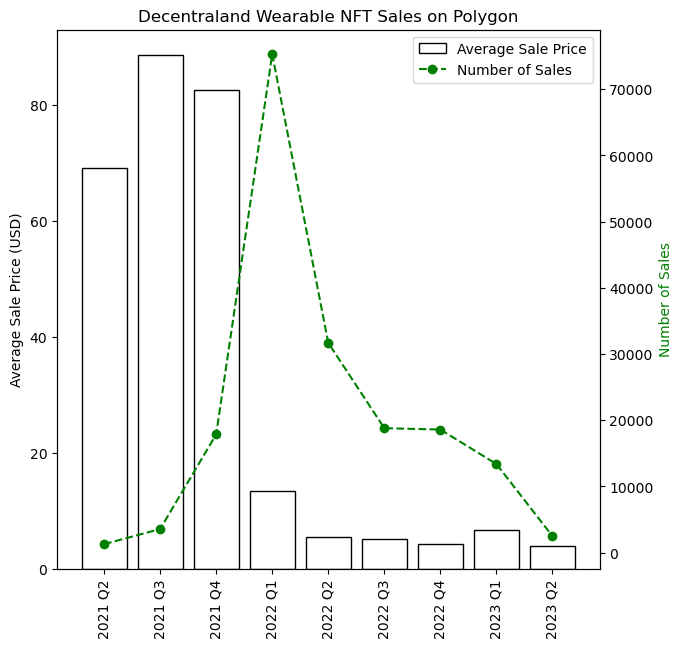

In [33]:
#make plot for average sale price and number of sales on Polygon
plt.figure();
fig, ax1 = plt.subplots()
fig.set_size_inches(7, 7)
ax2 = ax1.twinx()
ax1.bar(by_quarter_ave_P.iloc[:,1],by_quarter_ave_P.iloc[:,2], label = 'Average Sale Price',
       fill = False)
#ax1.bar(by_quarter_ave_P.iloc[:,1],by_quarter_ave_P.iloc[:,2], label = 'Polygon Average Sale Price',
        #fill = False, linewidth = 3, edgecolor = 'g')
ax2.plot(num_sales_by_quarter_P.iloc[:,1],num_sales_by_quarter_P.iloc[:,2],'g--', marker = 'o', label = 'Number of Sales')
#ax2.plot(num_sales_by_quarter_P.iloc[:,1],num_sales_by_quarter_P.iloc[:,2], 'g-o', label = 'Polygon Number of Sales')
ax1.set_ylabel('Average Sale Price (USD)')
ax2.set_ylabel('Number of Sales', color = 'g')
#ax2.ylim([0,70000])
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines+lines2,labels+labels2)
#ax1.set_xticklabels(ax1.get_xticks(), rotation = 90)
ax1.tick_params(axis = 'x', labelrotation = 90)
plt.title('Decentraland Wearable NFT Sales on Polygon')

In [34]:
#number of sales total on Ethereum
len(wear_data[wear_data['Network'] == 'Ethereum'])

9282

In [35]:
#number of sales total on Polygon
len(wear_data[wear_data['Network'] == 'Polygon'])

182976

In [36]:
w = 700
h = 350
# Let's implement filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["category"])

# Create a container for our two different views
base =  alt.Chart(wear_data_polygon_no_unique).properties(width=w, height=h)

# Let's specify our overview chart
overview = alt.Chart(wear_data_polygon_no_unique).mark_bar().encode(
    y = "mean(sale price (USD))",
    x = "category",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=h, width=w/2)

# Create a detail chart
detail = hist = base.mark_line().encode(
    y = "mean(sale price (USD))", 
    x = "Q Y",
    color = "rarity"
).transform_filter(selection).properties(height=h, width=w/2)

overview | detail

alt.HConcatChart(...)

In [37]:
# Let's implement filtering using dynamic queries. 
selection = alt.selection(type="multi", fields=["category"])

# Create a container for our two different views
base =  alt.Chart(wear_data_polygon_no_unique).properties(width=500, height=250)

# Let's specify our overview chart
overview = alt.Chart(wear_data_polygon_no_unique).mark_bar().encode(
    y = "mean(sale price (USD))",
    x = "category",
    color=alt.condition(selection, alt.value("orange"), alt.value("lightgrey"))
).add_selection(selection).properties(height=250, width=250)

# Create a detail chart
detail = hist = base.mark_bar().encode(
    y = "mean(sale price (USD))", 
    x = "rarity"
).transform_filter(selection).properties(height=250, width=250)

overview | detail

alt.HConcatChart(...)

(0.0, 100.0)

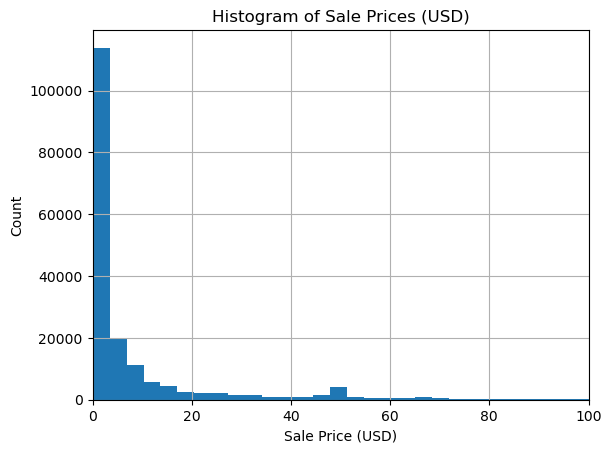

In [38]:
#Histogram of sale price on Polygon transactions
wear_data_polygon.hist(column = 'sale price (USD)', bins = 6000)
plt.title('Histogram of Sale Prices (USD)')
plt.xlabel('Sale Price (USD)')
plt.ylabel('Count')
plt.xlim([0,100])